In [2]:
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.extend([os.path.abspath(os.path.join(".."))])
from src.python.settings import plotting_settings

Contains visualizations for the paper's main figure.

# Likelihood

In [8]:
def plot_likelihood(alpha, likelihood_params, scaling, plotname=None):
    
    fig, ax = plt.subplots(1, 1, figsize=(1, 1))

    x = np.linspace(0, 1, 100)
    primary = stats.beta(*likelihood_params).pdf(x)
    primary_scaled_low = stats.beta(scaling[0] * likelihood_params[0] + 1, scaling[0] * likelihood_params[1] + 1).pdf(x)
    primary_scaled_high = stats.beta(scaling[1] * likelihood_params[0] + 1, scaling[1] * likelihood_params[1] + 1).pdf(x)

    ax.plot(x, primary, color=plotting_settings["colors"][1], alpha=alpha)
    ax.plot(x, primary_scaled_low, color=plotting_settings["colors"][1], alpha=alpha)
    ax.plot(x, primary_scaled_high, color=plotting_settings["colors"][1], alpha=alpha)

    #ax.set_ylim(0, 5.5)
    ax.set_yticks([])
    ax.set_xticks([])
    sns.despine(left=True)

    if plotname:
        plt.savefig(f"../figures/likelihood_{plotname}.png", dpi=300, bbox_inches="tight")

In [74]:
alpha = 0.7

scaling = [0.2, 5]

likelihood_low = [0.7, 3]
likelihood_medium = [2, 4]
likelihood_high = [5, 5]

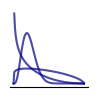

In [75]:
plot_likelihood(alpha=alpha, likelihood_params=likelihood_low, scaling=scaling, plotname="low")

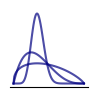

In [76]:
plot_likelihood(alpha=alpha, likelihood_params=likelihood_medium, scaling=scaling, plotname="medium")

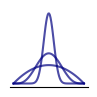

In [77]:
plot_likelihood(alpha=alpha, likelihood_params=likelihood_high, scaling=scaling, plotname="high")

# Prior

In [90]:
def plot_prior(mu, cov, plotname=None):
    x = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x, x)
    XY = np.column_stack((X.ravel(), Y.ravel()))
    Z = stats.multivariate_normal.pdf(XY, mean=mu, cov=cov).reshape(X.shape)

    plt.figure(figsize=(1, 1))
    plt.contourf(X, Y, Z, cmap='viridis')
    #plt.contour(X, Y, Z, cmap='viridis')
    plt.xticks([])
    plt.yticks([])
    sns.despine(left=True)

    if plotname:
        plt.savefig(f"../figures/prior_{plotname}.png", dpi=300, bbox_inches="tight", pad_inches=-0.05)

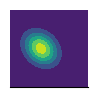

In [91]:
mu = [0.4, 0.5]
var = 0.02
covariance = -0.005
cov = [[var, covariance], [covariance, var]]
plot_prior(mu, cov, "1")

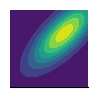

In [92]:
mu = [0.7, 0.7]
var = 0.08
covariance = 0.06
cov = [[var, covariance], [covariance, var]]
plot_prior(mu, cov, "2")

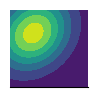

In [93]:
mu = [0.3, 0.7]
var = 0.1
covariance = 0.02
cov = [[var, covariance], [covariance, var]]
plot_prior(mu, cov, "3")

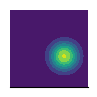

In [95]:
mu = [0.7, 0.4]
var = 0.015
covariance = 0.0
cov = [[var, covariance], [covariance, var]]
plot_prior(mu, cov, "4")

# Data

In [96]:
def plot_data(alpha, N, noise, seed, plotname=None):
    
    fig, ax = plt.subplots(1, 1, figsize=(1, 1))

    np.random.seed(seed)
    x = np.random.rand(N)
    noise = np.random.normal(0, noise, N)  # Adding some noise to x
    y = x + noise 

    ax.scatter(x, y, color=plotting_settings["colors"][2], alpha=alpha)
    ax.set_yticks([])
    ax.set_xticks([])
    sns.despine(left=True)

    if plotname:
        plt.savefig(f"../figures/data_{plotname}.png", dpi=300, bbox_inches="tight")

In [97]:
N = 20
noise = 0.5

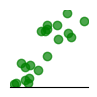

In [114]:
plot_data(alpha, N, noise=0.2, seed=1, plotname=1)

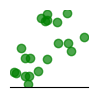

In [115]:
plot_data(alpha, N, noise=0.4, seed=1, plotname=2)

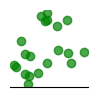

In [116]:
plot_data(alpha, N, noise=0.7, seed=1, plotname=3)

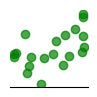

In [117]:
plot_data(alpha, N, noise=0.3, seed=4, plotname=4)